In [46]:
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
import numpy as np
import kaleidoscope.qiskit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from kaleidoscope import qsphere, bloch_sphere
%matplotlib inline

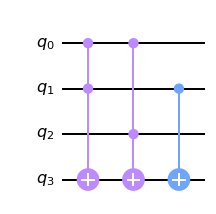

In [47]:
# result state |1> on q3 when number is odd |0> when number is even

qc_odd = QuantumCircuit(4, name='qc_odd')
qc_odd.ccx(0, 1, 3)
qc_odd.ccx(0, 2, 3)
qc_odd.cx(1, 3)

gate_search_odd = qc_odd.to_gate()
gate_search_odd.name = "Uf"

qc_odd.draw(output="mpl")

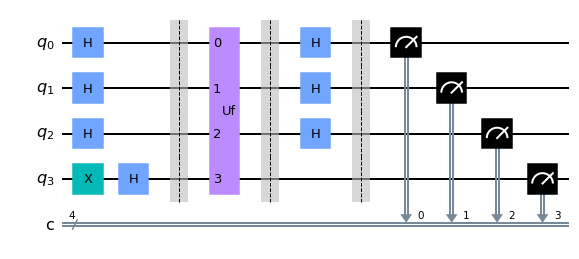

In [48]:
qc = QuantumCircuit(4, 4, name='qc_final')

qc.x(3)
qc.h(range(4))
qc.barrier()
qc.append(gate_search_odd, [0,1,2,3]) # balanced function
qc.barrier()
qc.h(range(3))
qc.barrier()
qc.measure(range(4), range(4))

qc.draw(output="mpl")

{'0101': 1}


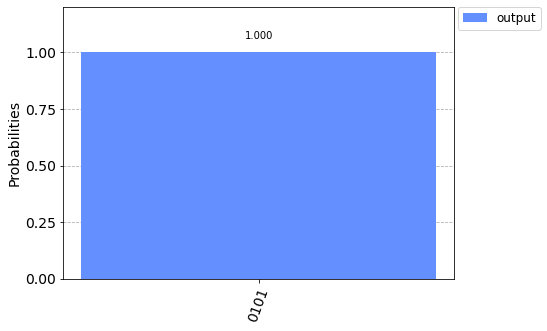

In [49]:
# simulators
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1).result().get_counts()

print(sim_counts)
plot_histogram([sim_counts], legend=['output'])

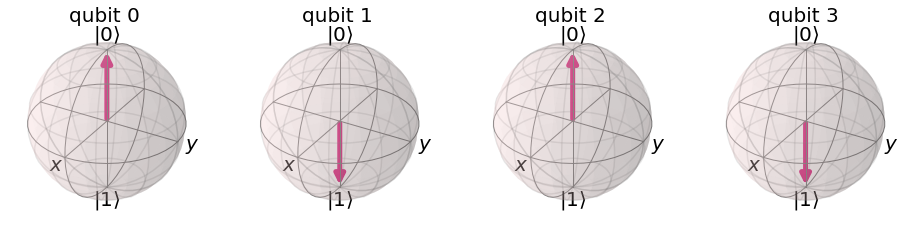

In [50]:
plot_bloch_multivector(sim_state_vector)

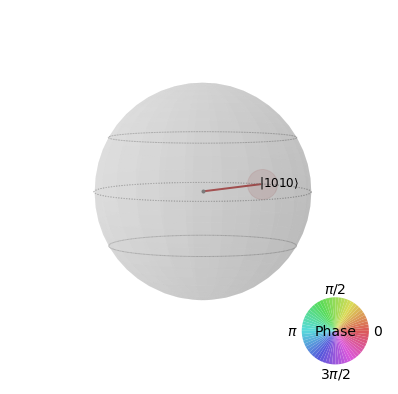

In [51]:
plot_state_qsphere(sim_state_vector)

In [52]:
bloch_sphere(qc.statevector())

In [53]:
qsphere(qc.statevector())